In [2]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf
import json
import os
s = json.load(open("nk1877_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
print nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [4]:
bsize = gp.GeoDataFrame.from_file("Manhattan/MNMapPLUTO.shp")
print bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1387b7d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x134233090>]], dtype=object)

/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


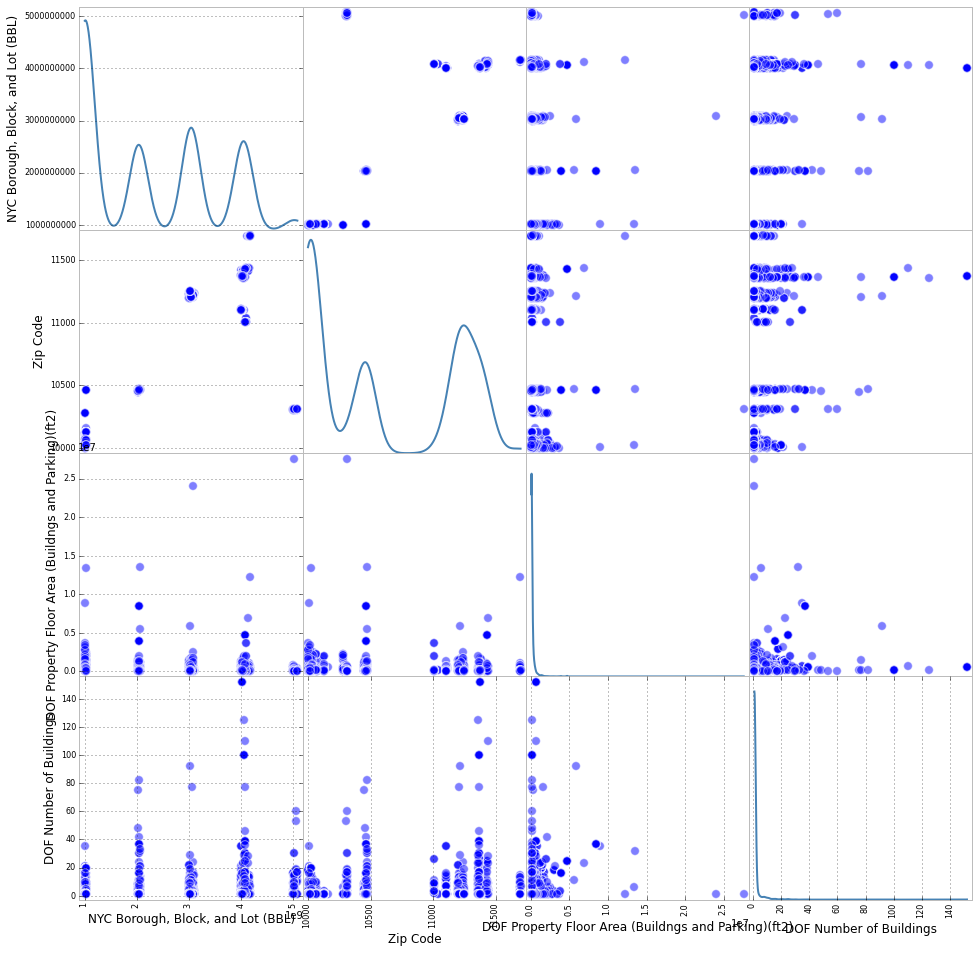

In [5]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

In [6]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False
    

In [7]:
#nrg["NYC Borough, Block, and Lot (BBL)"].head()
print nrg['Site EUI(kBtu/ft2)']

Record Number
16099                 180.5
500                    82.1
5017     137.69999999999999
5116                  103.2
363                      74
6876                   36.4
10714                 114.8
1214                    130
1544     138.30000000000001
1905                  56909
2301                   88.2
15059                  15.7
674                     NaN
2537                   85.7
2841                  195.7
2945     79.099999999999994
15120                 144.1
3053                  200.9
4233                  104.6
4777                   86.7
4912                  102.1
5210                   21.2
5295                   78.3
1575                    NaN
15025                  55.2
4208                   83.2
4799                  145.1
1568                   59.4
5427                   88.7
5476                  100.8
                ...        
14559                   NaN
14560                   NaN
14748                   NaN
14753                   NaN
13582 

In [8]:
nrg['Site EUI(kBtu/ft2)']=nrg['Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)


In [9]:
#indx=[]

#for k in nrg['Site EUI(kBtu/ft2)']: 
#    indx.append(canconvert(k))
#print len(indx), indx


In [10]:
#indx=[]
#k=[]
#for m in range(0,len(nrg.columns)):
#    indx.append(canconvert(j))
#    for j in nrg[nrg.columns[m]]:
        
#        indx.append(canconvert(j))
#        k.append(j)
#print len(indx), indx[100]

In [11]:
#print nrg['Site EUI(kBtu/ft2)']

In [12]:
print nrg['Site EUI(kBtu/ft2)'].astype(float)
print bsize.BBL.astype(float)

Record Number
16099      180.5
500         82.1
5017       137.7
5116       103.2
363         74.0
6876        36.4
10714      114.8
1214       130.0
1544       138.3
1905     56909.0
2301        88.2
15059       15.7
674          NaN
2537        85.7
2841       195.7
2945        79.1
15120      144.1
3053       200.9
4233       104.6
4777        86.7
4912       102.1
5210        21.2
5295        78.3
1575         NaN
15025       55.2
4208        83.2
4799       145.1
1568        59.4
5427        88.7
5476       100.8
          ...   
14559        NaN
14560        NaN
14748        NaN
14753        NaN
13582        NaN
13947        NaN
14777        NaN
14779        NaN
14409        NaN
13262        NaN
13261        NaN
12523        NaN
12529        NaN
12536        NaN
13929        NaN
13944        NaN
13945        NaN
13821        NaN
13829        NaN
13837        NaN
13838        NaN
13847        NaN
14352        NaN
12976        NaN
12978        NaN
12984        NaN
12987        NaN


In [13]:
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)']
bblnrgdata = pd.merge(nrg,bsize,on = "BBL")

/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)
/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1049: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


In [14]:
#print bblnrgdata.head()
bblnrgdata["Reported Property Floor Area (Building(s)) (ft²)"]=bblnrgdata["Reported Property Floor Area (Building(s)) (ft²)"].convert_objects(convert_numeric=True)

/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1572: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(_values_from_object(key))


In [15]:
bblnrgdata['totalnrg'] = bblnrgdata['Site EUI(kBtu/ft2)']*bblnrgdata["Reported Property Floor Area (Building(s)) (ft²)"]

In [16]:
len(bblnrgdata['UnitsTotal'])

6545

In [18]:
bblnrgdata['totalnrg'].head()

0    19323877.0
1     8923786.2
2     6484984.8
3     7252000.0
4    26574210.0
Name: totalnrg, dtype: float64

(1, 1000)

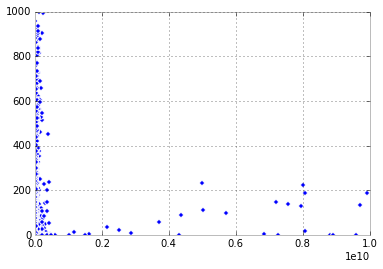

In [19]:
import matplotlib.pyplot as plt
ax1 = plt.subplot()
ax1.scatter(bblnrgdata['totalnrg'],bblnrgdata['UnitsTotal'])
ax1.set_xlim([1000,1e10])
ax1.set_ylim([1,1000])



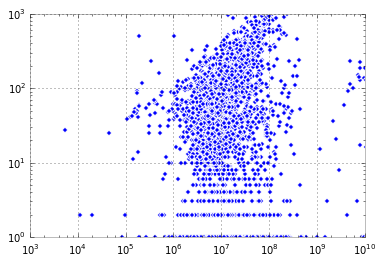

In [20]:
ax1 = plt.subplot()
ax1.scatter(bblnrgdata['totalnrg'],bblnrgdata['UnitsTotal'])
ax1.set_ylim([1,1000])
ax1.set_xlim([1000,1e10])

ax1.set_xscale('log')
ax1.set_yscale('log')


In [21]:
cleandata = bblnrgdata[(bblnrgdata['UnitsTotal']>0) & (bblnrgdata['UnitsTotal']<1000) & (bblnrgdata['totalnrg']>0) & (bblnrgdata['totalnrg']<1e10)]

In [22]:
cleandata.head()

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough_x,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry,totalnrg
0,1005050001,NaN,1005050001,1007817,150,VARICK STREET,Manhattan,10013,Filed,82.1,...,1926,None,10013,M1-6,None,None,None,12a,"POLYGON ((982849.6037999988 203886.2427999973,...",19323877.0
1,1021420100,NaN,1021420100,1063495,4079,BROADWAY,Manhattan,10032,Filed,137.7,...,1924,None,10032,R8,None,None,None,3b,"POLYGON ((1001098.760600001 246912.0266000032,...",8923786.2
2,1021750080,NaN,1021750080,1064235,60,SHERMAN AVENUE,Manhattan,10040,Filed,103.2,...,1920,None,10040,R7-2,None,None,None,3a,"POLYGON ((1004289.818000004 253753.9872000068,...",6484984.8
3,1003360005,NaN,1003360005,1088884,16,BIALYSTOKER PLACE,Manhattan,10002,Filed,74.0,...,1982,Y,10002,R8,None,None,None,12c,"POLYGON ((988978.3273999989 200091.3113999963,...",7252000.0
4,1008070028,NaN,1-00807-0028,1015181,119,WEST 31 STREET,Manhattan,10001,Filed,130.0,...,1912,None,10001,C6-4.5,None,None,None,8d,"POLYGON ((987142.3643999994 212082.1648000032,...",26574210.0


(1, 1000)

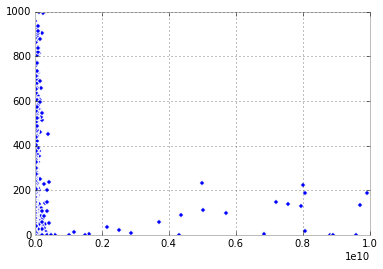

In [23]:
import matplotlib.pyplot as plt
ax1 = plt.subplot()
ax1.scatter(cleandata['totalnrg'],cleandata['UnitsTotal'])
ax1.set_xlim([1000,1e10])
ax1.set_ylim([1,1000])


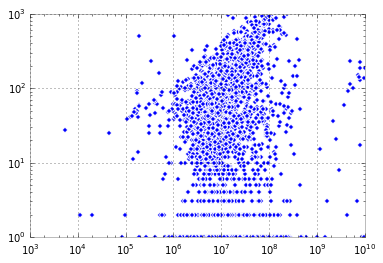

In [24]:
ax1 = plt.subplot()
ax1.scatter(cleandata['totalnrg'],cleandata['UnitsTotal'])
ax1.set_ylim([1,1000])
ax1.set_xlim([1000,1e10])

ax1.set_xscale('log')
ax1.set_yscale('log')


In [25]:
lm = sm.OLS(cleandata['UnitsTotal'],cleandata['totalnrg'],missing='drop').fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     28.44
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           1.01e-07
Time:                        12:13:43   Log-Likelihood:                -32147.
No. Observations:                4956   AIC:                         6.430e+04
Df Residuals:                    4955   BIC:                         6.430e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
totalnrg    2.644e-08   4.96e-09      5.333      0.000      1.67e-08  3.62e-08
==============================================================================
Omnibus:                     2999.164   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30214.612
Skew:                           2.794   Prob(JB):                         0.00
Kurtosis:                      13.728   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:               totalnrg   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     56.32
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           7.26e-14
Time:                        12:15:02   Log-Likelihood:                -3378.5
No. Observations:                4956   AIC:                             6761.
Df Residuals:                    4954   BIC:                             6774.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.9143      0.018    387.562      0.0

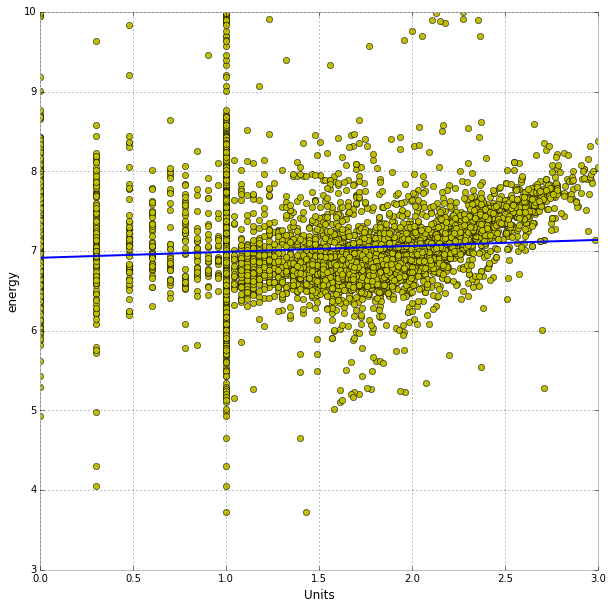

In [31]:
y=cleandata['totalnrg']
x=cleandata['UnitsTotal']

X1=sm.add_constant(np.log10(x))
Y1=np.log10(y)
lm1 = sm.OLS(Y1,X1).fit()
print lm1.summary()
fig1=figure(figsize=(10,10))
Xa1 = np.arange(0,4,1)
Ya1 = (lm1.params)[1]*Xa1 + (lm1.params)[0]
fig1.add_subplot(111)
plot(X1,Y1,'yo')
plot(Xa1,Ya1,'blue')
plt.xlabel("Units")
plt.ylabel("energy")


                            OLS Regression Results                            
Dep. Variable:             UnitsTotal   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     56.32
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           7.26e-14
Time:                        12:13:48   Log-Likelihood:                -5105.9
No. Observations:                4956   AIC:                         1.022e+04
Df Residuals:                    4954   BIC:                         1.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5971      0.141      4.228      0.0

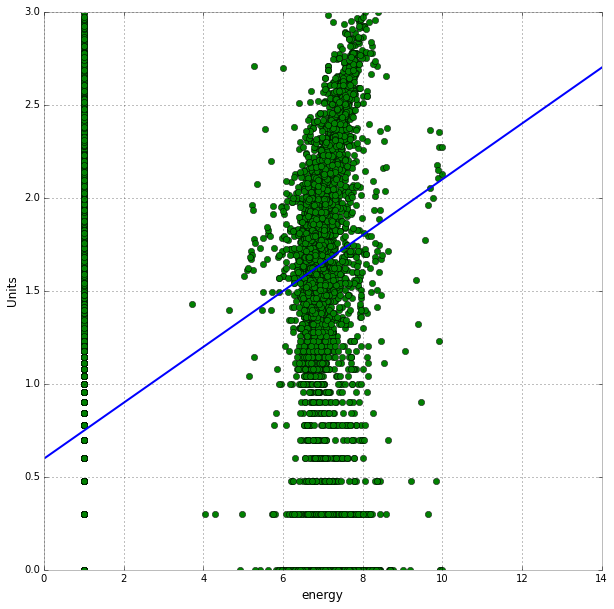

In [27]:
x=cleandata['totalnrg']
y=cleandata['UnitsTotal']

X1=sm.add_constant(np.log10(x))
Y1=np.log10(y)
lm1 = sm.OLS(Y1,X1).fit()
print lm1.summary()
fig1=figure(figsize=(10,10))
Xa1 = np.arange(0,15,1)
Ya1 = (lm1.params)[1]*Xa1 + (lm1.params)[0]
fig1.add_subplot(111)
plot(X1,Y1,'go')
plot(Xa1,Ya1,'blue')
plt.ylabel("Units")
plt.xlabel("energy")

##look at the fit summary: which is better? could you do a likelihood ratio test here? why or why not??

###First model is a best fit. No Liklihood test can't be done as degree of freedom for both is same

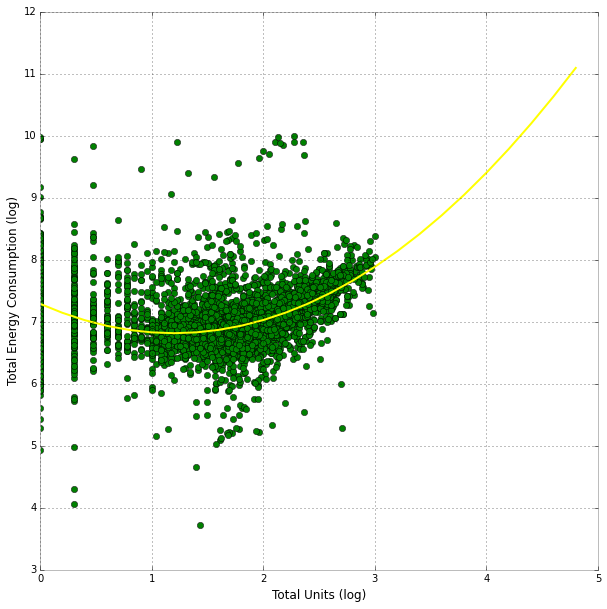

In [32]:
curve = np.polyfit(x, y, 2)
X3 = np.log10(x)
Y3 = np.log10(y)
model3 = np.polyfit(X3, Y3, 2)

#Fitting the second degree curve
fig3 = figure(figsize = (10,10))
ax = fig3.add_subplot(111)
ax.plot (X3, Y3, 'go')
Xp3 = np.arange(0, 5, .2)
Yp3 = model3[0]*Xp3**2 + model3[1]*Xp3 + model3[2]
ax.plot (Xp3, Yp3, 'yellow')
plt.xlabel('Total Units (log)')
plt.ylabel('Total Energy Consumption (log)')

###look at the fit summary: which is better? could you do a likelihood ratio test here? why or why not??

###This model appears to have a better fit for a polynomial line.